In [44]:
import random

In [45]:
def generate_array(size=42, max_value=99, zero_percent=20, small_number_percent=20):
  array = []
  num_zeros = int(size * zero_percent / 100)
  num_small_numbers = int(size * small_number_percent / 100)

  array.extend([0] * num_zeros)

  array.extend(random.choices(range(1, 10), k=num_small_numbers))

  remaining_elements = size - num_zeros - num_small_numbers
  array.extend(random.choices(range(-max_value, max_value+1), k=remaining_elements))

  random.shuffle(array)

  return array

result = generate_array()
print(result)

[9, 42, 51, 24, 48, 3, -88, 0, 48, 0, 47, 0, -9, -32, 5, 77, -21, -1, 1, -4, 0, 0, 1, -69, 7, -36, 0, 5, -6, -22, -61, 13, 11, 3, 0, -6, 4, -2, -82, -16, 0, -46]


In [46]:
def save_array_to_file(array, filename="Array.txt", delimiter="\n"):
    with open(filename, "w") as file:
        file.writelines(str(item) + delimiter for item in array)

my_array = generate_array()

save_array_to_file(my_array)
print("файл збережено!")

файл збережено!


In [48]:
def read_array_from_file(filename="Array.txt"):
    try:
        with open(filename, 'r') as file:
            array = [line.strip() for line in file]
            print("Масив з файлу:", array)
    except FileNotFoundError:
        print(f"Файл {filename} не знайдено.")

read_array_from_file()

Масив з файлу: ['15', '-99', '95', '-84', '2', '3', '-89', '-33', '-16', '0', '12', '4', '71', '0', '-80', '-56', '-69', '0', '-18', '68', '32', '46', '0', '0', '4', '-8', '61', '15', '14', '56', '9', '2', '1', '0', '-70', '-24', '-85', '6', '-84', '0', '-78', '0']


In [51]:
import matplotlib.pyplot as plt
from colorama import Fore, Style
filename = 'Array.txt'

Масив із виділеними елементами:
15 -99 95 -84 2 3 -89 -33 -16 0 12 4 71 0 -80 -56 -69 0 -18 68 32 46 0 0 4 -8 61 15 14 56 9 2 1 0 -70 -24 -85 6 -84 0 -78 0 


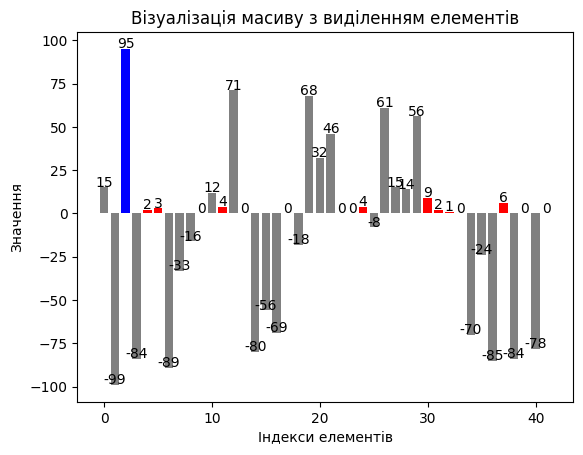

In [52]:
def read_array_from_file(filename="Array.txt"):
    try:
        with open(filename, 'r') as file:
            # Зчитуємо всі рядки файлу і перетворюємо в числа
            array = [int(line.strip()) for line in file]
            return array
    except FileNotFoundError:
        print(f"Файл {filename} не знайдено.")
        return []

def visualize_array_with_colors(array):
    if not array:
        return

    max_value = max(array)
    bar_colors = []

    for num in array:
        if num == max_value:
            bar_colors.append('blue')  # Синій для максимального елемента
        elif 1 <= num <= 9:
            bar_colors.append('red')  # Червоний для елементів від 1 до 9
        else:
            bar_colors.append('gray')  # Сірий для всіх інших

    # Побудова діаграми
    plt.bar(range(len(array)), array, color=bar_colors)

    # Додавання значень на діаграму
    for i, value in enumerate(array):
        plt.text(i, value + 0.5, str(value), ha='center')

    # Налаштування осей і заголовка
    plt.xlabel("Індекси елементів")
    plt.ylabel("Значення")
    plt.title("Візуалізація масиву з виділенням елементів")
    plt.show()

def print_colored_array(array):
    max_value = max(array)
    
    for num in array:
        if num == max_value:
            print(Fore.BLUE + str(num), end=' ')  # Виділяємо максимальний синім
        elif 1 <= num <= 9:
            print(Fore.RED + str(num), end=' ')  # Червоний для елементів від 1 до 9
        else:
            print(Style.RESET_ALL + str(num), end=' ')  # Звичайний колір для інших
    print(Style.RESET_ALL)  # Скидання кольорів

# Основна частина програми
array = read_array_from_file()
print("Масив із виділеними елементами:")
print_colored_array(array)
visualize_array_with_colors(array)

In [53]:
def count_zeros_in_file(filename="Array.txt"):
  with open(filename, 'r') as file:
    numbers = [int(line.strip()) for line in file]
    return numbers.count(0)
result = count_zeros_in_file()
print("Кількість нулів:", result)

Кількість нулів: 8


In [54]:
def count_elements_after_max(filename="Array.txt", min_value=1, max_value=9):
    with open(filename, 'r') as file:
        numbers = [int(line.strip()) for line in file]
     
    max_value_index = numbers.index(max(numbers))
    count = 0

    for num in numbers[max_value_index+1:]:
        if min_value <= num <= max_value:
            count += 1
    return count

result = count_elements_after_max()
print("Кількість елементів від 1 до 9 після максимуму:", result)


Кількість елементів від 1 до 9 після максимуму: 8


Відсортований масив: [2, 3, 4, 4, 9, 2, 1, 6, 0, 0, 0, 0, 0, 0, 0, 0, 95, 71, 68, 61, 56, 46, 32, 15, 15, 14, 12, -8, -16, -18, -24, -33, -56, -69, -70, -78, -80, -84, -84, -85, -89, -99]


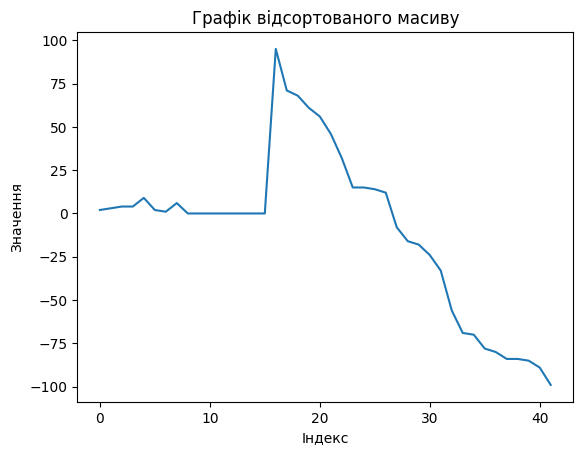

In [55]:
import matplotlib.pyplot as plt

def process_array(filename="Array.txt"):
    with open(filename, 'r') as file:
        numbers = [int(line.strip()) for line in file]

    group1 = [num for num in numbers if 1 <= num <= 9]
    group2 = [num for num in numbers if num == 0]
    group3 = sorted([num for num in numbers if num not in group1 and num not in group2], reverse=True)

    sorted_numbers = group1 + group2 + group3

    print("Відсортований масив:", sorted_numbers)

    plt.plot(sorted_numbers)
    plt.title("Графік відсортованого масиву")
    plt.xlabel("Індекс")
    plt.ylabel("Значення")
    plt.show()

process_array()